### 1. Load the tips dataset from either pydataset or seaborn.

In [29]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pydataset import data
import math

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import explained_variance_score


In [30]:
df = data('tips')
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [31]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

- from sklearn.linear_model import LinearRegression

- assuming X and y are already defined

model = LinearRegression().fit(X, y)

predictions = model.predict(X) 

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
#create and fit the model
model = LinearRegression().fit(df[['total_bill']], df.tip)


In [34]:
#use the model
df['yhat'] = model.predict(df[['total_bill']])

In [35]:
#create new colun yhat_baseline
df['yhat_baseline'] = df.tip.mean()

In [36]:
#show new column
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279


## 3. Plot the residuals for the linear regression model that you made.

In [37]:
df['baseline_residuals'] = df.tip - df.yhat_baseline
df['residuals'] = df.tip - df.yhat

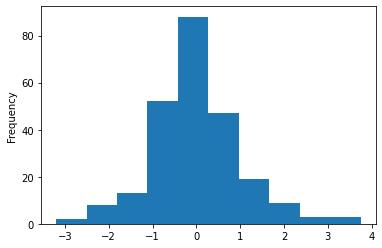

In [38]:
#show distribution of residuals
df.residuals.plot.hist()
plt.show()

#this shows normal distribution

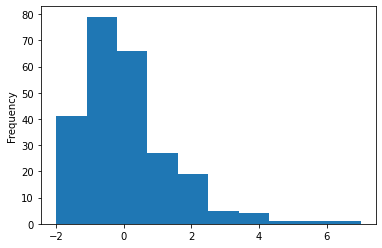

In [39]:
#show distribution of residuals baseline
df.baseline_residuals.plot.hist()
plt.show()

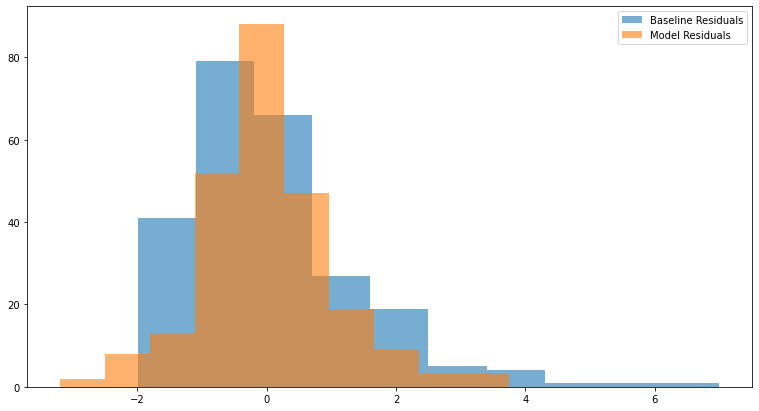

In [42]:
#plot baseline over residuals
fig, ax = plt.subplots(figsize=(13,7))
ax.hist(df.baseline_residuals, label='Baseline Residuals', alpha = .6)
ax.hist(df.residuals, label='Model Residuals', alpha = .6)
ax.legend()
plt.show()

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [43]:
#calculate sum of squared errors (SSE)
sse = (df.residuals**2).sum()
sse

252.788743850776

In [46]:
#calculate explained sum of squares (ESS)
ess = ((df.yhat - df.tip.mean())**2).sum()
ess

212.4237331984042

In [47]:
#calculate total sum of squares (TSS)
tss = ((df.tip - df.tip.mean())**2).sum()
tss

465.2124770491804

In [48]:
#calculate mean squared errors (MSE)
n = df.shape[0]
mse = sse/n
mse

1.036019442011377

In [49]:
#calculate root mean squared errors (RSME)
rmse = math.sqrt(mse)
rmse

1.0178504025697377

In [51]:
#model score - done manually
ess = ((df.yhat - df.tip.mean())**2).sum()
tss = ((df.tip - df.tip.mean())**2).sum()
print('ess:%4f' % ess)

ess/tss

ess:212.423733


0.45661658635167607

## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [53]:
sse_baseline = (df.baseline_residuals ** 2).sum()
mse_baseline = sse_baseline/n
rmse_baseline = math.sqrt(mse_baseline)

print(f'''
Baseline:

sse: {sse_baseline}
mse: {mse_baseline}
rmse: {rmse_baseline}
''')


Baseline:

sse: 465.2124770491804
mse: 1.906608512496641
rmse: 1.3807999538298954



In [55]:
#baseline score - done manually
ess = ((df.yhat_baseline - df.tip.mean())**2).sum()
tss = ((df.tip - df.tip.mean())**2).sum()

print('ess: %4f' % ess)
ess/tss

ess: 0.000000


0.0

In [56]:
#baseline score - done with import
r2_score(df.tip, df.yhat_baseline)

1.1102230246251565e-16

## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [57]:
# break it down

#compare SSE model to SSE baseline
#output: if SSE < sse_baseline, sse performs better than baseline
#OR if SSE > sse_baseline, sse performs worse than baseline

if sse < sse_baseline:
    print(f'The model SSE performs BETTER than the sse_baseline')
else:
    print(f'The model SSE performs WORSE thant the sse_baseline')

The model SSE performs BETTER than the sse_baseline


## 7. What is the amount of variance explained in your model?

In [60]:
#explained variance score - done manually
R2 = ess/tss
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")

R-squared =  0.0
Percent of variance in y explained by x =  0.0 %


In [58]:
#explained variance score - using import
evs = explained_variance_score(df.tip, df.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457


## 8. Is your model better than the baseline model?

In [62]:
if rmse < rmse_baseline:
    print(f'The model RMSE performs BETTER than the rmse_baseline')
else:
    print(f'The model RMSE performs WORSE than the rmse_baseline')

The model RMSE performs BETTER than the rmse_baseline


## 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
 - sum of squared errors (SSE)
 - explained sum of squares (ESS)
 - total sum of squares (TSS)
 - mean squared error (MSE)
 - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [66]:
def plot_residuals(df, y, yhat):
    '''
    This function takes in actual value and predicted value
    then creates a histogram
    '''
    # residuals
    df['residuals'] = df[y] - df[yhat]
    
    fig, ax = plt.subplots(figsize=(13,7))
    ax.hist(df.residuals, label='model residuals', alpha=.6)
    ax.legend()
    return

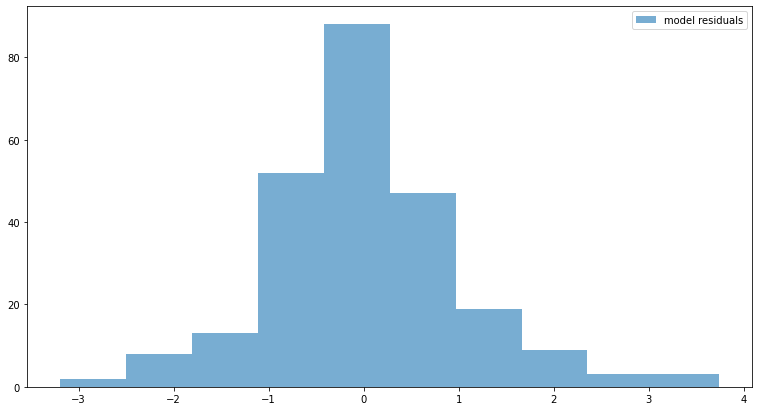

In [67]:
plot_residuals(df, 'tip', 'yhat')

In [73]:
def regression_errors(df, y, yhat):
    '''
    This function takes in actual value and predicted value
    then outputs: the sse, ess, tss, mse and rmse
    '''
    df['residuals'] = df[y] - df[yhat]
    sse = (df.residuals **2).sum()
    ess = ((df[yhat] - df[y].mean())**2).sum()
    tss = ((df[y] - df[y].mean())**2).sum()
    n = df.shape[0]
    mse = sse/n
    rmse = math.sqrt(mse)
    
    print(f'''
        sse: {sse: .4f}
        ess: {ess: .4f}
        tss: {tss: .4f}
        mse: {mse: .4f}
       rmse: {rmse: .4f}
        ''')

In [74]:
regression_errors(df, 'tip', 'yhat')


        sse:  252.7887
        ess:  212.4237
        tss:  465.2125
        mse:  1.0360
       rmse:  1.0179
        


In [78]:
def baseline_mean_errors(df, y, yhat):
    '''
    This function takes in actual value and predicted value
    then outputs the sse, mse and rmse for the baseline model
    '''
    df['residuals_baseline'] = df[y] - df[yhat]
    sse_baseline = (df.residuals_baseline**2).sum()
    n = df.shape[0]
    mse_baseline = sse_baseline/n
    rmse_baseline = math.sqrt(mse_baseline)
    
    print(f'''
        sse_baseline: {sse_baseline: .4f}
        mse_baseline: {mse_baseline: .4f}
       rmse_baseline: {rmse_baseline: .4f}
       ''')

In [80]:
baseline_mean_errors(df, 'tip', 'yhat')


        sse_baseline:  252.7887
        mse_baseline:  1.0360
       rmse_baseline:  1.0179
       


In [81]:
def better_than_baseline(y, yhat):
    '''
    This function takes in the actual value and predicted value
    then returns true if your model performs better than the baseline, otherwise fasle
    '''
    return regression_errors(y, yhat)[2] < baseline_mean_errors(y)[2]

In [82]:
better_than_baseline('tip', 'yhat')

TypeError: regression_errors() missing 1 required positional argument: 'yhat'

## 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.